


<h1 align="center">Simplilearn Post Graduate Program - Data Science - In Partnership With Purdue University</h1>  

<div style="font-size:22px;">
<b> <center> Project Report - California Housing Price Prediction </center></b><br>
</div>


<div  style="font-size: 17px">
Organization: <b>Simplilearn - Purdue University</b><br>
Batch: <b>PGP DS Mar 2022 COHORT 2</b><br>
Course: <b>PG -DS - Data Science with Python</b><br>
Project: <b>California Housing Price Prediction</b><br>
Programming Language: <b>Python</b><br>
Submitted by: <b>Lavkush Singh</b>
</div>

## Dataset Description

**Dataset has the following fields:**

* **longitude**	(signed numeric - float) : Longitude value for the block in California, USA
* **latitude**	(numeric - float ) : Latitude value for the block in California, USA
* **housing_median_age**	(numeric - int ) : Median age of the house in the block
* **total_rooms**	(numeric - int ) : Count of the total number of rooms (excluding bedrooms) in all houses in the block
* **total_bedrooms**	(numeric - float ) : Count of the total number of bedrooms in all houses in the block
* **population**	(numeric - int ) : Count of the total number of population in the block
* **households**	(numeric - int ) : Count of the total number of households in the block
* **median_incom**e	(numeric - float ) : Median of the total household income of all the houses in the block
* **ocean_proximity**	(numeric - categorical ) : Type of the landscape of the block [ Unique Values : 'NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'  ]
* **median_house_value**	(numeric - int ) : Median of the household prices of all the houses in the block

## Problem Statement

**The project aims at building a model of housing prices to predict median house values in California using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics. There are 20,640 districts in the project dataset.**

##### Analysis Tasks to be performed

- Build a model of housing prices to predict median house values in California using the provided dataset.
- Train the model to learn from the data to predict the median housing price in any district, given all the other metrics.
- Predict housing prices based on median_income and plot the regression chart for it.

### 1. Load the data

In [1]:
# importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
%matplotlib inline

In [2]:
housedata = pd.read_excel('Datasets/1553768847_housing.xlsx') # reading the dataset

In [3]:
housedata.head() #viewing first few records

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [4]:
housedata.info()   # viewing basic info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [5]:
housedata.duplicated().sum() # checking if the dataframe has any duplicate entries

0

### 2. Handling Missing Values

In [6]:
# checking how many total null values we have
nulls = housedata.isnull().sum()
print(nulls)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64


In [7]:
# checking the percent of null values present in dataset (only null values greater then 0 will be displayd)

(nulls[nulls > 0]/housedata.shape[0])*100

total_bedrooms    1.002907
dtype: float64

In [8]:
housedata['total_bedrooms'].skew().round(2) # checking the magnitude of the skewness

3.46

In [9]:
# imputing missing values with median of 'total_bedrooms' column since it is highly skewed

housedata['total_bedrooms'].fillna(value=housedata['total_bedrooms'].median(), inplace = True)

In [10]:
housedata.isnull().sum() # checking if all the missing values are now removed

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

### Understanding Data and Feature Engineering

In [11]:
housedata.describe().round(2) # getting basic descriptive statistics of numerical columns 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,-119.57,35.63,28.64,2635.76,536.84,1425.48,499.54,3.87,206855.82
std,2.00,2.14,12.59,2181.62,419.39,1132.46,382.33,1.90,115395.62
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,14999.00
25%,-121.80,33.93,18.00,1447.75,297.00,787.00,280.00,2.56,119600.00
50%,-118.49,34.26,29.00,2127.00,435.00,1166.00,409.00,3.53,179700.00
75%,-118.01,37.71,37.00,3148.00,643.25,1725.00,605.00,4.74,264725.00
max,-114.31,41.95,52.00,39320.00,6445.00,35682.00,6082.00,15.00,500001.00


In [12]:
housedata['ocean_proximity'].value_counts() # ocean_proximity is categorical column, so getting its value counts

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [13]:
# converting columns into array to traverse through it and plotting graph as sub-plots

arr_cols = np.array(['population', 'total_rooms', 'total_bedrooms', 'households']).reshape(2,2)
arr_cols

array([['population', 'total_rooms'],
       ['total_bedrooms', 'households']], dtype='<U14')

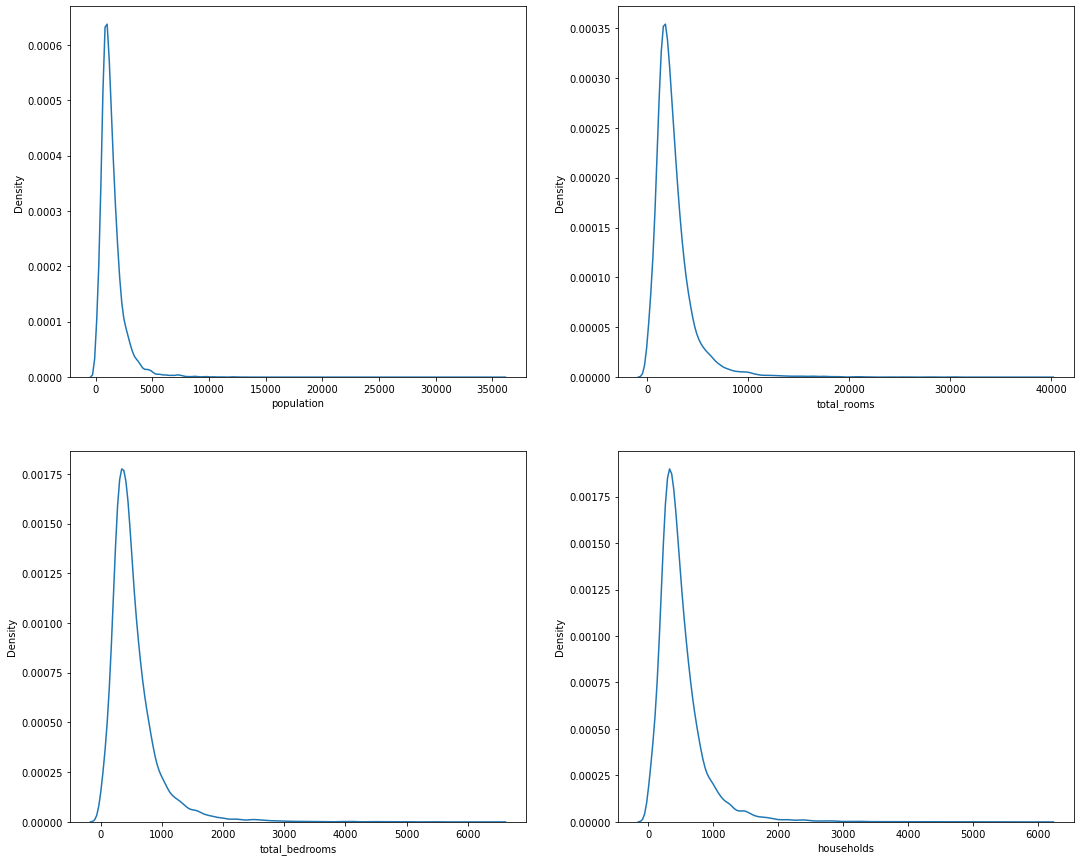

In [14]:
# plotting KDE plot to view how the data is distributed

fig, axes = plt.subplots(2, 2, figsize=(18, 15))

for i in range(2):
    for j in range(2):
            sns.kdeplot(ax=axes[i, j], data = housedata, x = arr_cols[i,j])


In [15]:
# converting columns into array to traverse through it and plotting graph as sub-plots

arr_cols_2 = np.array(['housing_median_age', 'median_income', 'median_house_value', 'ocean_proximity']).reshape(2,2)
arr_cols_2

array([['housing_median_age', 'median_income'],
       ['median_house_value', 'ocean_proximity']], dtype='<U18')

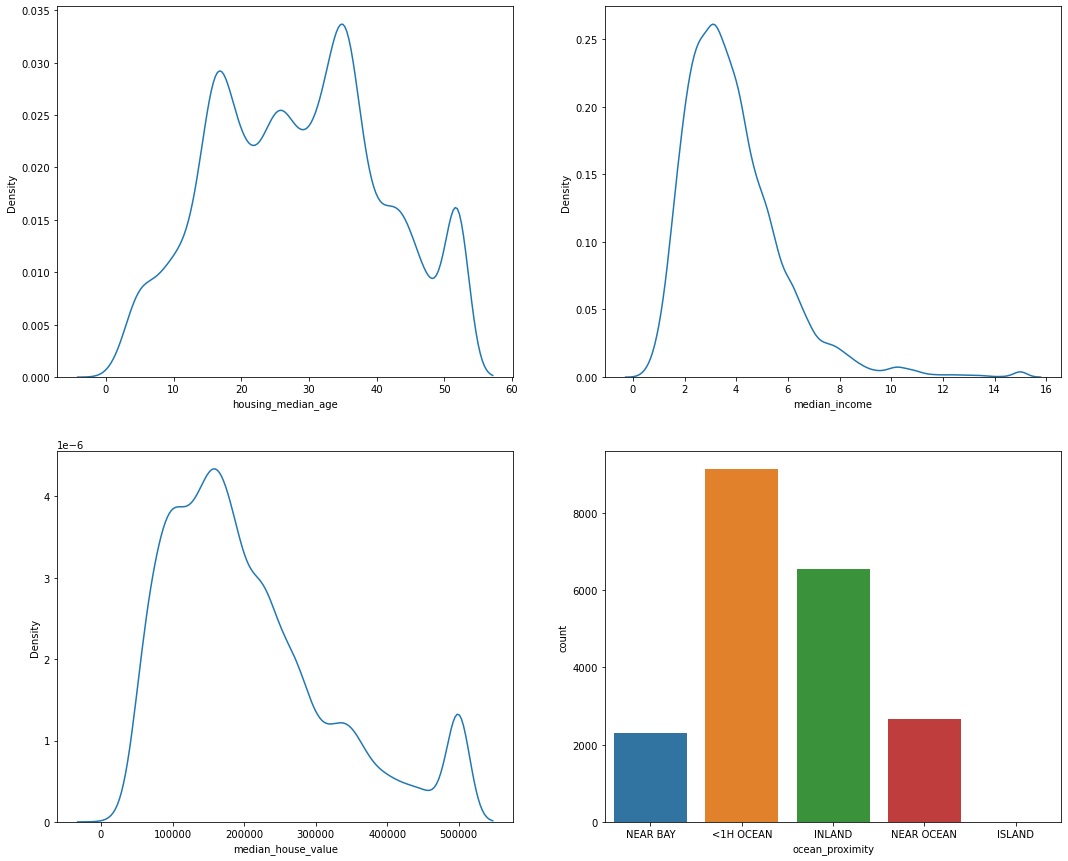

In [16]:
# KDE plots for all columns except the categorical column for which we have plotted Bar-plot

fig, axes = plt.subplots(2, 2, figsize=(18, 15))

for i in range(2):
    for j in range(2):
        if(i == 1 & j == 1):
            sns.countplot(ax=axes[i, j], data = housedata, x = arr_cols_2[i,j])
        else:
            sns.kdeplot(ax=axes[i, j], data = housedata, x = arr_cols_2[i,j])


In [17]:
# below is the function which take latitude and longitue as input and returns city, state and country as output
# this function is made with an objective to extract information out of latitude and longitude columns present in the data

from geopy.geocoders import Nominatim

def get_city(lat, long):
    
    if (type(lat) != str) | (type(long) != str):
        lat = str(lat)
        long = str(long)
    
    geolocator = Nominatim(user_agent="geoapiExercises")
    location = geolocator.reverse(lat+","+long)
    address = location.raw['address']
    city = address.get('city', '')
    state = address.get('state', '')
    country = address.get('country', '')
    return city, state, country

In [18]:
# below is the function which take latitude and longitue as input and returns city, state and country as output
# this function is adjusted to make api calls with pauses to accomodate the limitations of 1 request per second

from geopy.geocoders import Nominatim
from random import randint
from time import sleep
def get_city_2(lat, long):
    sleep_sec = 1
    if (type(lat) != str) | (type(long) != str):
        lat = str(lat)
        long = str(long)
    sleep(randint(1*100,sleep_sec*100)/100)
    user_agent = 'user_me_{}'.format(randint(10000,99999))
    geolocator = Nominatim(user_agent=user_agent)
    location = geolocator.reverse(lat+","+long)
    address = location.raw['address']
    city = address.get('city', '')
    state = address.get('state', '')
    country = address.get('country', '')
    return city, state, country

In [19]:
get_city(37.86, -122.22) # testing of the get_city() function

('', 'California', 'United States')

In [20]:
# testing the code with few values of latitude and longitude

temp = housedata[["latitude", "longitude"]].head()
temp['Lat-Long-to-Info'] = temp.apply(lambda row: get_city(row['latitude'], row['longitude']), axis = 1)
temp

,latitude,longitude,Lat-Long-to-Info
0,37.88,-122.23,"(Oakland, California, United States)"
1,37.86,-122.22,"(, California, United States)"
2,37.85,-122.24,"(Oakland, California, United States)"
3,37.85,-122.25,"(Oakland, California, United States)"
4,37.85,-122.25,"(Oakland, California, United States)"


In [21]:
# splitting up the 'Lat-Long-to-Info' column into individual columns

new_col_list = ['city','state','country']
for n,col in enumerate(new_col_list):
    temp[col] = temp['Lat-Long-to-Info'].apply(lambda location: location[n])

temp = temp.drop('Lat-Long-to-Info',axis=1)
temp

,latitude,longitude,city,state,country
0,37.88,-122.23,Oakland,California,United States
1,37.86,-122.22,,California,United States
2,37.85,-122.24,Oakland,California,United States
3,37.85,-122.25,Oakland,California,United States
4,37.85,-122.25,Oakland,California,United States


In [22]:
housedata[["latitude", "longitude"]].drop_duplicates().head(10)  # This is a test sample to check if get_city_2() works

,latitude,longitude
0,37.88,-122.23
1,37.86,-122.22
2,37.85,-122.24
3,37.85,-122.25
6,37.84,-122.25
8,37.84,-122.26
10,37.85,-122.26
16,37.85,-122.27
19,37.84,-122.27
25,37.85,-122.28


In [23]:
# This peice of code would pass unique values of latitude and longitudes to get_city_2() function and 
# would fetch respective city, state and country 

housedata_unique_lat_long = housedata[["latitude", "longitude"]].drop_duplicates().head(10)
scraped_data = housedata_unique_lat_long.apply(lambda row: get_city_2(row['latitude'], row['longitude']), 
                                                                   axis = 1)

In [24]:
scraped_data

0      (Oakland, California, United States)
1             (, California, United States)
2      (Oakland, California, United States)
3      (Oakland, California, United States)
6      (Oakland, California, United States)
8      (Oakland, California, United States)
10     (Oakland, California, United States)
16    (Berkeley, California, United States)
19     (Oakland, California, United States)
25    (Berkeley, California, United States)
dtype: object

Since we have limitations of fetching location from coordinates, a better approch is to cluster the given coordinates and based 
on that we can put them in groups. This way, we will get rid of two features (latitude and longitue), and instead will have a 
single feature (cluster or group in which given latitude and longitude belongs to)

In [25]:
housedata.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [26]:
lat_long_data = housedata[["latitude", "longitude"]] # extracting only latitude and longitude

In [27]:
# fitting K-Means clustering algorithm for multiple K values and storing the metric 'sum of squared distances'

sum_of_squared_distances = []
k_values = range(2,20)

for k in k_values:
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(lat_long_data)
    sum_of_squared_distances.append(kmeans_model.inertia_)

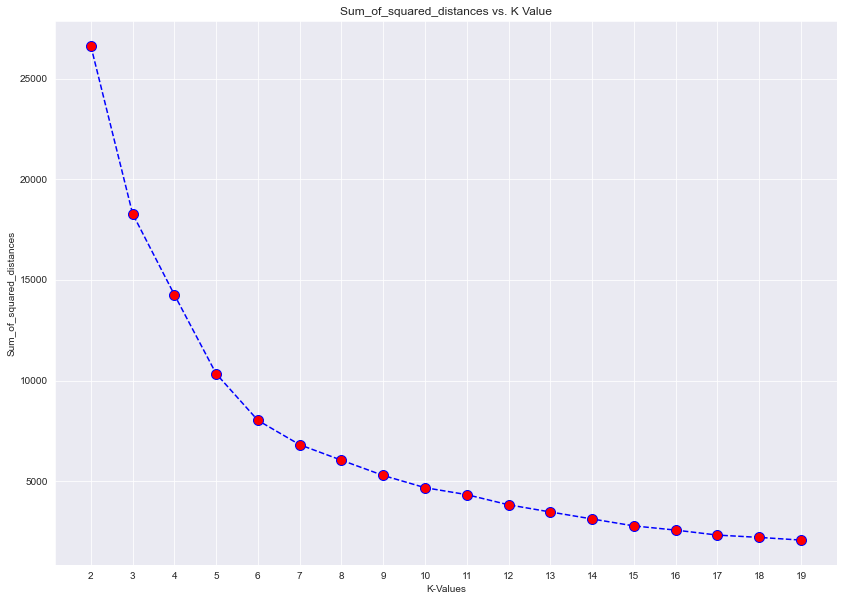

In [28]:
# plotting the k values versus the 'sum of squared distances'

sns.set_style('darkgrid')

plt.figure(figsize=(14,10))
plt.plot(k_values,sum_of_squared_distances, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Sum_of_squared_distances vs. K Value')
plt.xticks(range(2,20))
plt.xlabel('K-Values')
plt.ylabel('Sum_of_squared_distances');

From the above graph, we see that the elbow point is somewhere between 5 to 7. Hence, we will select k = 6 for our analysis

In [29]:
# Fitting the data with k = 6

kmeans_model = KMeans(n_clusters=6)
kmeans_model.fit(lat_long_data)

KMeans(n_clusters=6)

In [30]:
# Printing out cluster centers, just in case if required

kmeans_model.cluster_centers_

array([[  40.17953556, -122.75143687],
       [  34.01332397, -118.11814873],
       [  38.39667957, -121.13467957],
       [  37.66910899, -122.17297969],
       [  35.95939794, -119.68459289],
       [  33.05233055, -116.93609099]])

In [31]:
# model labels can be accessed using .labels_ attribute

kmeans_model.labels_

array([3, 3, 3, ..., 2, 2, 2])

In [32]:
lat_long_data.shape # checking shape of data we used in clustering (having latitude and longitude)

(20640, 2)

In [33]:
# creating respective clusters using the KMeans model built

clusters = pd.DataFrame(kmeans_model.labels_, columns=['lat_long_cluster'])
clusters.shape

(20640, 1)

Below are the ways with which we can combine the data frame 

- pd.concat([lat_long_data, clusters], axis=1)
- lat_long_data = lat_long_data.join(clusters)
- pd.merge(housedata, clusters, left_index=True, right_index=True)

In [34]:
# Here I have used merge function to combine the clusters to main dataframe and 

housedata_processed = pd.merge(housedata, clusters, left_index=True, right_index=True) 

# left_index and right_index is True, because we do not have anything in common except the index values in both tables

In [35]:
# removed the original columns latitude and longitude

housedata_processed.drop(['latitude', 'longitude'], axis=1, inplace=True)  # dropping latitude and longitude columns
housedata_processed.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,lat_long_cluster
0,41,880,129.0,322,126,8.3252,NEAR BAY,452600,3
1,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500,3
2,52,1467,190.0,496,177,7.2574,NEAR BAY,352100,3
3,52,1274,235.0,558,219,5.6431,NEAR BAY,341300,3
4,52,1627,280.0,565,259,3.8462,NEAR BAY,342200,3


### 3. Encoding of the Categorical variables

In [36]:
encoded_ocean_proximity = pd.get_dummies(data = housedata_processed['ocean_proximity'])
encoded_ocean_proximity

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [37]:
housedata_processed.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,lat_long_cluster
0,41,880,129.0,322,126,8.3252,NEAR BAY,452600,3
1,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500,3
2,52,1467,190.0,496,177,7.2574,NEAR BAY,352100,3
3,52,1274,235.0,558,219,5.6431,NEAR BAY,341300,3
4,52,1627,280.0,565,259,3.8462,NEAR BAY,342200,3


In [38]:
# I wanted to insert the categoical columns at a specific location and hence I used concat method as follows:

housedata_processed = pd.concat((housedata_processed['lat_long_cluster'],
                                 housedata_processed.iloc[:,:6],
                                 encoded_ocean_proximity, 
                                 housedata.iloc[:,-1]), axis = 1)
housedata_processed.head()

,lat_long_cluster,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
0,3,41,880,129.0,322,126,8.3252,0,0,0,1,0,452600
1,3,21,7099,1106.0,2401,1138,8.3014,0,0,0,1,0,358500
2,3,52,1467,190.0,496,177,7.2574,0,0,0,1,0,352100
3,3,52,1274,235.0,558,219,5.6431,0,0,0,1,0,341300
4,3,52,1627,280.0,565,259,3.8462,0,0,0,1,0,342200


In [39]:
housedata_processed.columns # viewing column names

Index(['lat_long_cluster', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN',
       'median_house_value'],
      dtype='object')

Since one of the categorical column name (<1H OCEAN) has space which will be problematic later on in ols regression model building, therefore, I am renaming this column, and as well as other categorical columns, just to maintain uniform naming convention of all columns

In [40]:
housedata_processed.rename(columns = {'<1H OCEAN': 'less_1h_ocean', 
                                      'INLAND': 'inland', 
                                      'ISLAND': 'island', 
                                      'NEAR BAY':'near_bay', 
                                      'NEAR OCEAN':'near_ocean'}, inplace = True)

In [41]:
# As we have 4 categories, and we are representing them with 0 and 1, three columns are enough to serve the purpose. 
# Therefore, dropping off 'island' column

housedata_processed.drop('island', axis = 1, inplace = True)
housedata_processed.columns

Index(['lat_long_cluster', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'less_1h_ocean', 'inland', 'near_bay', 'near_ocean',
       'median_house_value'],
      dtype='object')

### Visualization, Correlation and Pre-Processing of Data

In [42]:
housedata_processed['lat_long_cluster'].value_counts() # checking the counts of the latitude longitude clusters  

1    8902
3    4826
2    2325
5    2154
4    1744
0     689
Name: lat_long_cluster, dtype: int64

In [43]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

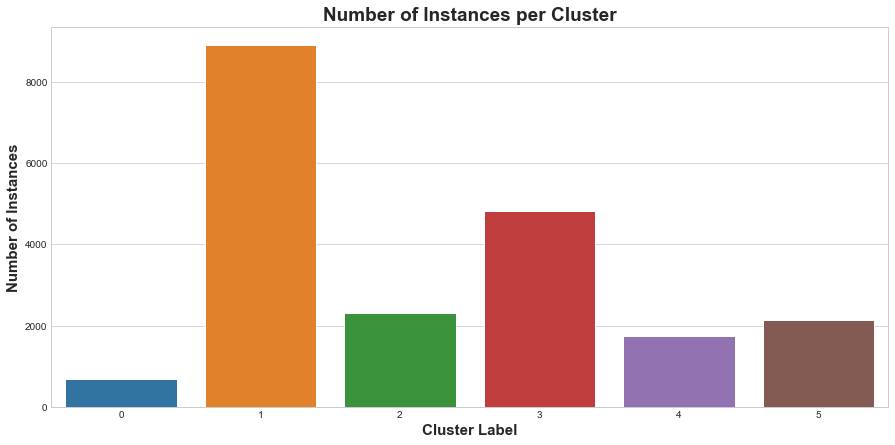

In [44]:
# Plotting bar graph to visualize the results
plt.style.use('seaborn-whitegrid')

plt.figure(figsize=(15,7))
sns.barplot(x = housedata_processed['lat_long_cluster'].value_counts().index, 
            y = housedata_processed['lat_long_cluster'].value_counts().values)
plt.title("Number of Instances per Cluster", fontweight="bold", fontdict = {'fontsize' : 19})
plt.xlabel("Cluster Label", fontweight="bold", fontdict = {'fontsize' : 15})
plt.ylabel("Number of Instances", fontweight="bold", fontdict = {'fontsize' : 15});

In [45]:
# Checking the distribution of sum of median_house_value prices as per the latitude-longitude-cluster

cluster_wise_total_house_price = housedata_processed.groupby('lat_long_cluster').sum()['median_house_value']
cluster_wise_total_house_price

lat_long_cluster
0      63549998
1    2046839444
2     292577501
3    1269773346
4     213879822
5     382883950
Name: median_house_value, dtype: int64

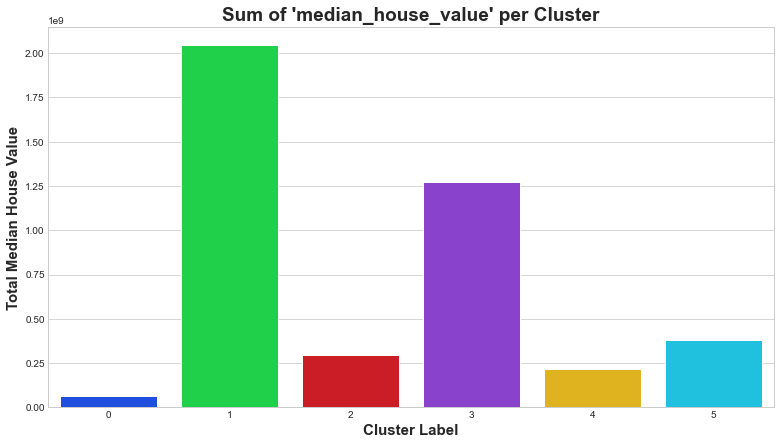

In [46]:
# Plotting bar graph to visualize the results
plt.style.use('seaborn-bright')

plt.figure(figsize=(13,7))
sns.barplot(x = cluster_wise_total_house_price.index, y = cluster_wise_total_house_price.values)
plt.title("Sum of 'median_house_value' per Cluster", fontweight="bold", fontdict = {'fontsize' : 19})
plt.xlabel("Cluster Label", fontweight="bold", fontdict = {'fontsize' : 15})
plt.ylabel("Total Median House Value", fontweight="bold", fontdict = {'fontsize' : 15});

In [47]:
# Checking the distribution of mean of median_income prices as per the latitude-longitude-cluster

cluster_wise_avg_of_median_income = housedata_processed.groupby('lat_long_cluster').mean()['median_income'].round(2)
cluster_wise_avg_of_median_income

lat_long_cluster
0    2.47
1    4.09
2    3.14
3    4.47
4    3.01
5    3.57
Name: median_income, dtype: float64

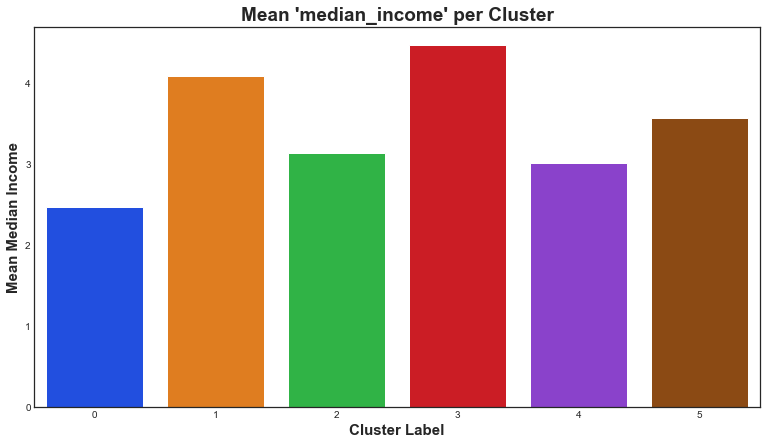

In [48]:
# Plotting bar graph to visualize the results
plt.style.use('seaborn-white')

plt.figure(figsize=(13,7))
sns.barplot(x = cluster_wise_avg_of_median_income.index, 
            y = cluster_wise_avg_of_median_income.values, 
            palette=sns.color_palette("bright", 6))
plt.title("Mean 'median_income' per Cluster", fontweight="bold", fontdict = {'fontsize' : 19})
plt.xlabel("Cluster Label", fontweight="bold", fontdict = {'fontsize' : 15})
plt.ylabel("Mean Median Income", fontweight="bold", fontdict = {'fontsize' : 15});

In [49]:
# Checking the distribution of mean of housing_median_age as per the latitude-longitude-cluster

cluster_wise_avg_house_age = housedata_processed.groupby('lat_long_cluster').mean()['housing_median_age'].round(2)
cluster_wise_avg_house_age

lat_long_cluster
0    24.61
1    30.24
2    25.05
3    32.15
4    25.11
5    22.19
Name: housing_median_age, dtype: float64

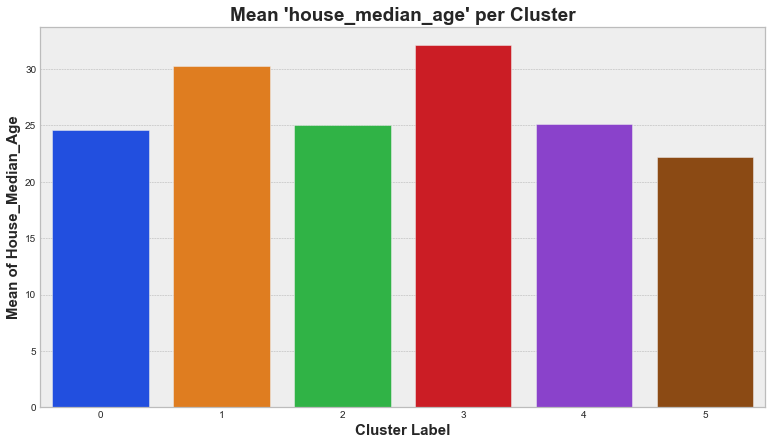

In [50]:
# Plotting bar graph to visualize the results
plt.style.use('bmh')
plt.figure(figsize=(13,7))
sns.barplot(x = cluster_wise_avg_house_age.index, 
            y = cluster_wise_avg_house_age.values,
           palette=sns.color_palette("bright", 6))
plt.title("Mean 'house_median_age' per Cluster", fontweight="bold", fontdict = {'fontsize' : 19})
plt.xlabel("Cluster Label", fontweight="bold", fontdict = {'fontsize' : 15})
plt.ylabel("Mean of House_Median_Age", fontweight="bold", fontdict = {'fontsize' : 15});

Below I am checking if the data has multicoloniearity and if we have redundant features

In [51]:
# Making correlation plot

corr = housedata_processed.corr()

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

,lat_long_cluster,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,less_1h_ocean,inland,near_bay,near_ocean,median_house_value
lat_long_cluster,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
housing_median_age,-0.12,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
total_rooms,0.04,-0.36,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
total_bedrooms,0.02,-0.32,0.93,nan,nan,nan,nan,nan,nan,nan,nan,nan
population,-0.02,-0.30,0.86,0.87,nan,nan,nan,nan,nan,nan,nan,nan
households,0.01,-0.30,0.92,0.97,0.91,nan,nan,nan,nan,nan,nan,nan
median_income,-0.04,-0.12,0.20,-0.01,0.00,0.01,nan,nan,nan,nan,nan,nan
less_1h_ocean,-0.36,0.05,-0.00,0.02,0.07,0.04,0.17,nan,nan,nan,nan,nan
inland,0.04,-0.24,0.03,-0.01,-0.02,-0.04,-0.24,-0.61,nan,nan,nan,nan
near_bay,0.19,0.26,-0.02,-0.02,-0.06,-0.01,0.06,-0.31,-0.24,nan,nan,nan


In [52]:
# This is how original correlation matrix looks like

corr

,lat_long_cluster,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,less_1h_ocean,inland,near_bay,near_ocean,median_house_value
lat_long_cluster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing_median_age,-0.123634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_rooms,0.041557,-0.361262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_bedrooms,0.024481,-0.319026,0.927058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
population,-0.019781,-0.296244,0.857126,0.873535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
households,0.008030,-0.302916,0.918484,0.974366,0.907222,NaN,NaN,NaN,NaN,NaN,NaN,NaN
median_income,-0.037191,-0.119034,0.198050,-0.007617,0.004834,0.013033,NaN,NaN,NaN,NaN,NaN,NaN
less_1h_ocean,-0.363544,0.045300,-0.003031,0.017966,0.074613,0.042435,0.168876,NaN,NaN,NaN,NaN,NaN
inland,0.043997,-0.236645,0.025624,-0.006158,-0.020732,-0.039402,-0.237496,-0.607669,NaN,NaN,NaN,NaN
near_bay,0.194009,0.255172,-0.023022,-0.019667,-0.060880,-0.010093,0.056197,-0.314813,-0.240887,NaN,NaN,NaN


In [53]:
# Instead of viewing the entire correlation matrix, if I am interested in specific correlation values, 
# this is how we will get it, along with the column names which are correlated.

for row in corr.columns:
    for col in corr.columns:
        if corr.loc[row, col] >= 0.60 or corr.loc[row, col] < -0.60:
            print(f"{row}    {col}: {corr.loc[row, col]}")
        

total_bedrooms    total_rooms: 0.9270581965414207
population    total_rooms: 0.8571259728659829
population    total_bedrooms: 0.8735348611611192
households    total_rooms: 0.9184844926543111
households    total_bedrooms: 0.9743662937706982
households    population: 0.9072222660959659
inland    less_1h_ocean: -0.6076693393596981
median_house_value    median_income: 0.6880752079585577


In [54]:
# This below function calculates the Variance Inflation Factor, which basically tells us if the numerical column present in 
# our data is adding to the value or not.

def get_VIF(input_df):
    
    cols = input_df.columns
    
    for col in cols:
        X = input_df.drop(col, axis = 1)
        y = input_df[col]
        
        r_sq = ols(formula = 'y ~ X', data = input_df).fit().rsquared
        vif = round( 1/(1-r_sq),2)
        print(f"{col} VIF: {vif}")
        
        
        

In [55]:
housedata_processed.columns

Index(['lat_long_cluster', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'less_1h_ocean', 'inland', 'near_bay', 'near_ocean',
       'median_house_value'],
      dtype='object')

In [56]:
# excluding the categorical features and the target, below is the data for which VIF needs to be calculated

housedata_processed_vifs = housedata_processed[['housing_median_age', 'total_rooms', 'total_bedrooms',
                                                'population', 'households', 'median_income']]

##### Now, in order to determine if the column is significant with respect to information it is adding, VIF is checked, iterateively. After each iteration, VIF of column greater than 5 is removed, and the process continues until all columns have VIFs less than or equal to 5.

In [57]:
housedata_processed_vifs.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,41,880,129.0,322,126,8.3252
1,21,7099,1106.0,2401,1138,8.3014
2,52,1467,190.0,496,177,7.2574
3,52,1274,235.0,558,219,5.6431
4,52,1627,280.0,565,259,3.8462


In [58]:
get_VIF(housedata_processed_vifs)

housing_median_age VIF: 1.16
total_rooms VIF: 11.32
total_bedrooms VIF: 26.57
population VIF: 6.12
households VIF: 27.19
median_income VIF: 1.47


In [59]:
housedata_processed_vifs = housedata_processed_vifs.drop('households', axis = 1)

In [60]:
get_VIF(housedata_processed_vifs)

housing_median_age VIF: 1.15
total_rooms VIF: 11.32
total_bedrooms VIF: 10.69
population VIF: 4.62
median_income VIF: 1.46


In [61]:
housedata_processed_vifs = housedata_processed_vifs.drop('total_rooms', axis = 1)

In [62]:
get_VIF(housedata_processed_vifs)

housing_median_age VIF: 1.13
total_bedrooms VIF: 4.3
population VIF: 4.23
median_income VIF: 1.02


In [63]:
housedata_processed_vifs.head()

,housing_median_age,total_bedrooms,population,median_income
0,41,129.0,322,8.3252
1,21,1106.0,2401,8.3014
2,52,190.0,496,7.2574
3,52,235.0,558,5.6431
4,52,280.0,565,3.8462


##### Plotting Correlations again, after removing columns based on VIF values

In [64]:
fig = plt.figure(figsize=(7,5))

corr = housedata_processed_vifs.corr()

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

,housing_median_age,total_bedrooms,population,median_income
housing_median_age,nan,nan,nan,nan
total_bedrooms,-0.32,nan,nan,nan
population,-0.30,0.87,nan,nan
median_income,-0.12,-0.01,0.00,nan


<Figure size 504x360 with 0 Axes>

In [65]:
# This code displays the columns which are highly correlated along with the magnitude and sign

for row in corr.columns:
    for col in corr.columns:
        if corr.loc[row, col] >= 0.6 or corr.loc[row, col] < -0.6:
            print(f"{row}    {col}: {corr.loc[row, col]}")

population    total_bedrooms: 0.8735348611611192


##### Because, 'population' and 'total_bedrooms' are highly correlated, one can be dropped. I have plotted boxplot below to determine which column has higher range of outliars (the one having higher outliars can be dropped)

<AxesSubplot:>

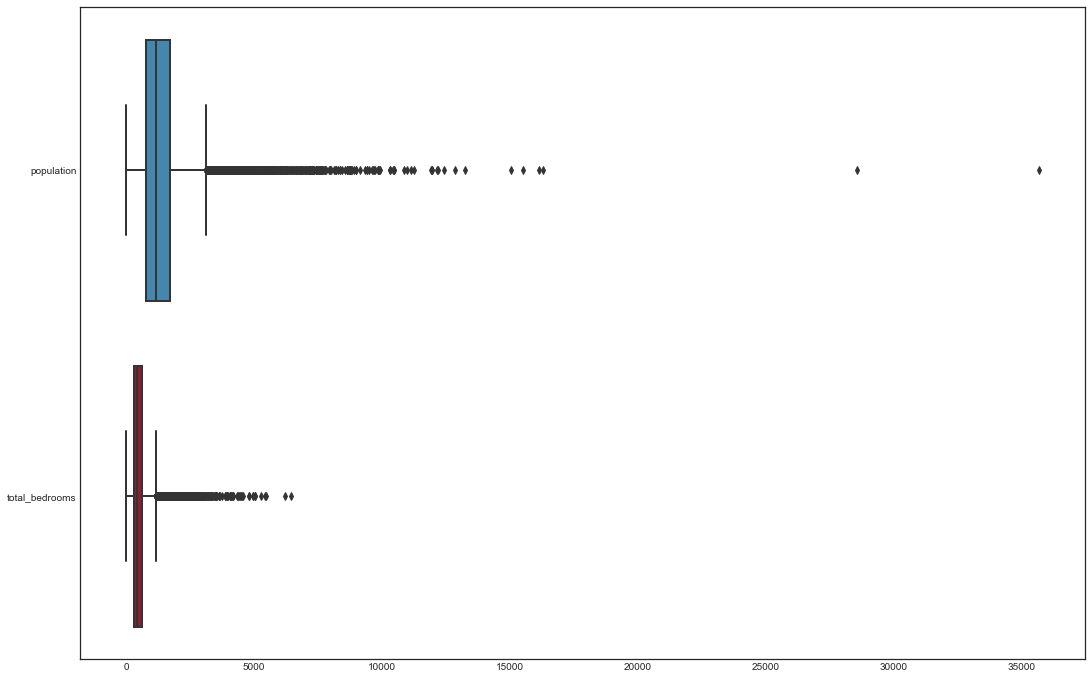

In [66]:
plt.style.use('seaborn-white')

plt.figure(figsize = (18,12))
sns.boxplot(data = housedata_processed_vifs[['population', 'total_bedrooms']], orient='h')

In [67]:
housedata_processed_vifs.drop('population', axis = 1, inplace = True) # dropping population 

In [68]:
# combining the entire data after removing non-significant columns

cat_cols_and_target = ['lat_long_cluster', 'less_1h_ocean', 'inland', 'near_bay', 'near_ocean','median_house_value']

housedata_processed = pd.concat([housedata_processed_vifs, housedata_processed[cat_cols_and_target]], axis = 1)
housedata_processed.head()

,housing_median_age,total_bedrooms,median_income,lat_long_cluster,less_1h_ocean,inland,near_bay,near_ocean,median_house_value
0,41,129.0,8.3252,3,0,0,1,0,452600
1,21,1106.0,8.3014,3,0,0,1,0,358500
2,52,190.0,7.2574,3,0,0,1,0,352100
3,52,235.0,5.6431,3,0,0,1,0,341300
4,52,280.0,3.8462,3,0,0,1,0,342200


### 4. Splitting of the dataset

In [69]:
# Splitting the data into features and target seperately

X = housedata_processed.drop('median_house_value', axis = 1)
y = housedata_processed['median_house_value']

In [70]:
# Splitting of training and test set into 80%-20% ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Standardizing the data

In [71]:
X_train.head(2)

,housing_median_age,total_bedrooms,median_income,lat_long_cluster,less_1h_ocean,inland,near_bay,near_ocean
14196,33,627.0,3.2596,5,0,0,0,1
8267,49,787.0,3.8125,1,0,0,0,1


In [72]:
X_train.iloc[:, :3].head(2).reset_index(drop = True)

,housing_median_age,total_bedrooms,median_income
0,33,627.0,3.2596
1,49,787.0,3.8125


In [73]:
X_train.iloc[:, 3:].head(2).reset_index(drop = True)

,lat_long_cluster,less_1h_ocean,inland,near_bay,near_ocean
0,5,0,0,0,1
1,1,0,0,0,1


In [74]:
# scaling input features (except the categorical columns)

robust_scaler = RobustScaler()

X_train_scaled = robust_scaler.fit_transform(X_train.iloc[:, :3])
X_train_scaled = pd.concat([pd.DataFrame(X_train_scaled, columns = X_train.iloc[:, :3].columns), 
                            X_train.iloc[:, 3:].reset_index(drop=True)], axis = 1)


X_test_scaled  = robust_scaler.transform(X_test.iloc[:, :3])
X_test_scaled = pd.concat([pd.DataFrame(X_test_scaled, columns = X_test.iloc[:, :3].columns), 
                           X_test.iloc[:, 3:].reset_index(drop=True)], axis = 1)


In [75]:
X_train_scaled.head()

,housing_median_age,total_bedrooms,median_income,lat_long_cluster,less_1h_ocean,inland,near_bay,near_ocean
0,0.210526,0.542470,-0.129709,5,0,0,0,1
1,1.052632,0.999286,0.120872,1,0,0,0,1
2,-1.315789,-0.302641,0.276686,4,0,0,0,1
3,0.368421,-0.199857,-0.726634,5,0,0,0,1
4,0.736842,-0.017131,0.003807,4,0,1,0,0


In [76]:
X_test_scaled.head()

,housing_median_age,total_bedrooms,median_income,lat_long_cluster,less_1h_ocean,inland,near_bay,near_ocean
0,-0.210526,-0.00571,-0.845058,4,0,1,0,0
1,0.052632,-0.00571,-0.459783,4,0,1,0,0
2,1.210526,-0.00571,-0.029776,3,0,0,1,0
3,-0.631579,-0.00571,0.993349,1,1,0,0,0
4,0.263158,-0.00571,0.081216,3,0,0,0,1


In [77]:
# scaling target variables

y_train_scaled = robust_scaler.fit_transform(y_train.values.reshape(-1,1))
y_test_scaled  = robust_scaler.transform(y_test.values.reshape(-1,1))

In [78]:
y_train_scaled

array([[-0.52881473],
       [ 1.39170824],
       [-0.04988818],
       ...,
       [ 0.29072768],
       [ 0.71322897],
       [ 0.9987958 ]])

In [79]:
y_test_scaled

array([[-0.90934113],
       [-0.92241528],
       [ 2.20300017],
       ...,
       [ 2.20300017],
       [-0.74006537],
       [-0.19507999]])

In [80]:
X_train_scaled.shape, X_test_scaled.shape

((16512, 8), (4128, 8))

In [81]:
y_train_scaled.shape, y_test_scaled.shape

((16512, 1), (4128, 1))

### 6. Building Linear Regression Model

In [82]:
linear_regression_model = LinearRegression() 

In [83]:
linear_regression_model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [84]:
y_pred_scaled = linear_regression_model.predict(X_test_scaled) #Predictions will be scaled as scaled data was used in training

In [85]:
y_pred = robust_scaler.inverse_transform(y_pred_scaled)   # getting the predictions in original scale
y_pred

array([[ 55673.36850733],
       [ 94382.96374567],
       [246529.66541181],
       ...,
       [422481.99082252],
       [111999.55434371],
       [200721.73112587]])

In [86]:
pd.DataFrame({'Actual Values': y_test, 'Predicted Values': y_pred.flatten()}).reset_index(drop=True) # just to view and confirm

,Actual Values,Predicted Values
0,47700,55673.368507
1,45800,94382.963746
2,500001,246529.665412
3,218600,284549.983833
4,278000,242164.914452
...,...,...
4123,263300,222325.860267
4124,266800,203906.685581
4125,500001,422481.990823
4126,72300,111999.554344


In [87]:
# Defining function to return the MAPE (Mean Absolute Percent Error)

def get_mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [88]:
# defining a single function to get all required metrics of regression, to avoid writing it again and again

def regression_metrics(actual, predicted):
    
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mape = get_mape(actual, predicted)
    r_squared = r2_score(actual, predicted)
    
    return round(mae,2), round(mse,2), round(rmse,2), round(mape,2), round(r_squared, 2)
    


In [89]:
any(housedata['median_house_value'] == 0) # checking if any of the target is 0, because MAPE will fail otherwise

False

In [90]:
mae, mse, rmse, mape, r_squared = regression_metrics(y_test, y_pred)

In [91]:
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Percent Error: {mape}%')
print(f'R Squared: {r_squared}')

Mean Absolute Error: 52622.29
Mean Squared Error: 5304356396.49
Root Mean Squared Error: 72831.01
Mean Absolute Percent Error: 74.73%
R Squared: 0.6


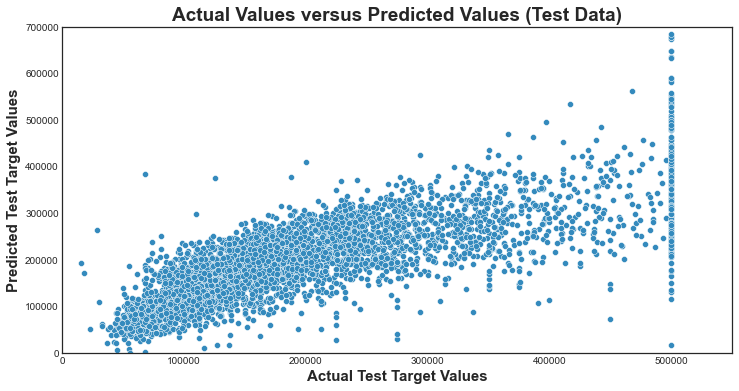

In [92]:
plt.style.use('seaborn-white')

plt.figure(figsize=(12,6))
sns.scatterplot(x=y_test,y=y_pred.ravel())
plt.xlim(0,550000)
plt.ylim(0, 700000)
plt.title("Actual Values versus Predicted Values (Test Data)", fontweight="bold", fontdict = {'fontsize' : 19})
plt.xlabel("Actual Test Target Values", fontweight="bold", fontdict = {'fontsize' : 15})
plt.ylabel("Predicted Test Target Values", fontweight="bold", fontdict = {'fontsize' : 15});

### 7. Bonus Exercise

In [93]:
linear_regression_model_2 = LinearRegression() # another linear model instantiation

In [94]:
y_train_scaled # this is the target variable (scaled by robust scaler)

array([[-0.52881473],
       [ 1.39170824],
       [-0.04988818],
       ...,
       [ 0.29072768],
       [ 0.71322897],
       [ 0.9987958 ]])

In [95]:
# training linear regression model with only single feature 'median_income'

linear_regression_model_2.fit(X_train_scaled['median_income'].values.reshape(-1,1), y_train_scaled)

LinearRegression()

In [96]:
# Predicting the target values of Training Data, and getting the original scaled values

y_train_pred = linear_regression_model_2.predict(X_train_scaled['median_income'].values.reshape(-1,1))
y_train_pred = robust_scaler.inverse_transform(y_train_pred)

In [97]:
# Predicted values will also be in scaled format, and getting predicted values in original scale 

y_pred_scaled_2 = linear_regression_model_2.predict(X_test_scaled['median_income'].values.reshape(-1,1))
y_pred_2 = robust_scaler.inverse_transform(y_pred_scaled_2)

In [98]:
mae, mse, rmse, mape, r_squared = regression_metrics(y_train, y_train_pred) # getting required regression performmance metrics

In [99]:
print("Train Data Metrics - Single feature Regression - 'median_income'\n")

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Percent Error: {mape}%')
print(f'R Squared: {r_squared}')

Train Data Metrics - Single feature Regression - 'median_income'

Mean Absolute Error: 62495.08
Mean Squared Error: 6991447170.18
Root Mean Squared Error: 83614.87
Mean Absolute Percent Error: 70.06%
R Squared: 0.48


In [100]:
# getting required regression performmance metrics
mae_test, mse_test, rmse_test, mape_test, r_squared_test = regression_metrics(y_test, y_pred_2) 

In [101]:
print("Test Data Metrics - Single feature Regression - 'median_income'\n")
print(f'Mean Absolute Error: {mae_test}')
print(f'Mean Squared Error: {mse_test}')
print(f'Root Mean Squared Error: {rmse_test}')
print(f'Mean Absolute Percent Error: {mape_test}%')
print(f'R Squared: {r_squared_test}')

Test Data Metrics - Single feature Regression - 'median_income'

Mean Absolute Error: 62990.87
Mean Squared Error: 7091157771.77
Root Mean Squared Error: 84209.01
Mean Absolute Percent Error: 69.95%
R Squared: 0.46


In [102]:
y_test.shape, y_pred_2.shape

((4128,), (4128, 1))

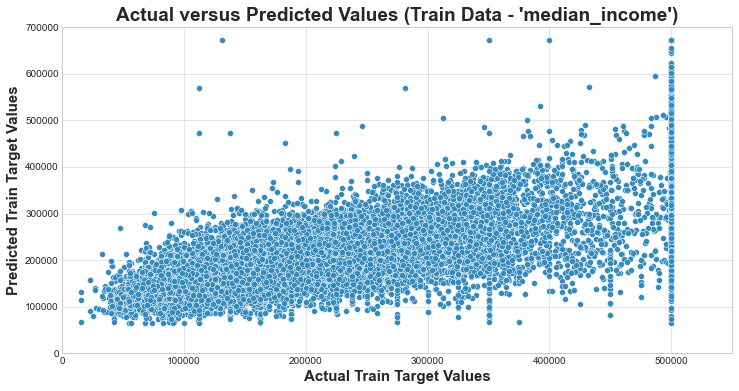

In [103]:
plt.style.use('seaborn-whitegrid')

plt.figure(figsize=(12,6))
sns.scatterplot(x=y_train,y=y_train_pred.ravel())
plt.xlim(0,550000)
plt.ylim(0, 700000)
plt.title("Actual versus Predicted Values (Train Data - 'median_income')", fontweight="bold", fontdict = {'fontsize' : 19})
plt.xlabel("Actual Train Target Values", fontweight="bold", fontdict = {'fontsize' : 15})
plt.ylabel("Predicted Train Target Values", fontweight="bold", fontdict = {'fontsize' : 15});

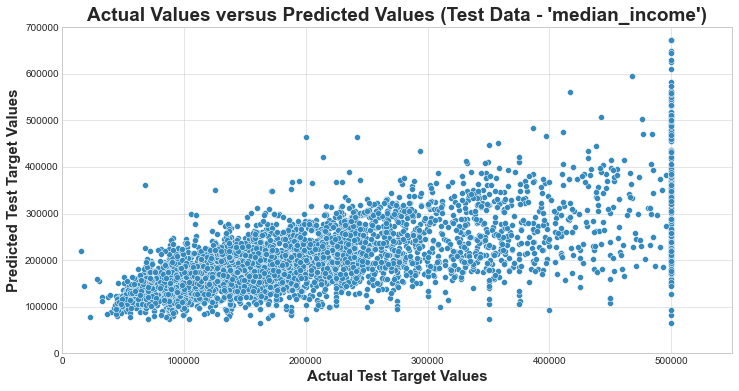

In [104]:
plt.style.use('seaborn-whitegrid')

plt.figure(figsize=(12,6))
sns.scatterplot(x=y_test,y=y_pred_2.ravel())
plt.xlim(0,550000)
plt.ylim(0, 700000)
plt.title("Actual Values versus Predicted Values (Test Data - 'median_income')", fontweight="bold", fontdict = {'fontsize' : 19})
plt.xlabel("Actual Test Target Values", fontweight="bold", fontdict = {'fontsize' : 15})
plt.ylabel("Predicted Test Target Values", fontweight="bold", fontdict = {'fontsize' : 15});

### Further Analysis: OLS Regression from Statsmodel

##### Trying to build the linear regression model from OLS Regression (of Statsmodel library)

In [105]:
# getting all the input column names (features)

features = ' + '.join(X_train_scaled.columns)
features

'housing_median_age + total_bedrooms + median_income + lat_long_cluster + less_1h_ocean + inland + near_bay + near_ocean'

In [106]:
X_train_scaled.head(3)

,housing_median_age,total_bedrooms,median_income,lat_long_cluster,less_1h_ocean,inland,near_bay,near_ocean
0,0.210526,0.542470,-0.129709,5,0,0,0,1
1,1.052632,0.999286,0.120872,1,0,0,0,1
2,-1.315789,-0.302641,0.276686,4,0,0,0,1


In [107]:
pd.DataFrame(y_train_scaled, columns=['median_house_value']).head(3)

,median_house_value
0,-0.528815
1,1.391708
2,-0.049888


In [108]:
# Combining training features and input variable to pass it in OLS function to build the model

ols_scaled_data = pd.concat([X_train_scaled, 
                             pd.DataFrame(y_train_scaled, columns=['median_house_value'])], axis = 1)
ols_scaled_data.head(3)

,housing_median_age,total_bedrooms,median_income,lat_long_cluster,less_1h_ocean,inland,near_bay,near_ocean,median_house_value
0,0.210526,0.542470,-0.129709,5,0,0,0,1,-0.528815
1,1.052632,0.999286,0.120872,1,0,0,0,1,1.391708
2,-1.315789,-0.302641,0.276686,4,0,0,0,1,-0.049888


In [109]:
model = ols(formula = 'median_house_value ~ ' + features, data = ols_scaled_data).fit() # building the model

In [110]:
model.summary() # viewing the summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     3241.
Date:                Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:31:16   Log-Likelihood:                -11857.
No. Observations:               16512   AIC:                         2.373e+04
Df Residuals:                   16503   BIC:                         2.380e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.4131      0.248      5.693      0.000       0.927       1.900
housing_median_age     0.1520      0.007     22.452      0.000       0.139       0.165
total_bedrooms         0.0640      0.003     18.601      0.000       0.057       0.071
median_income          0.5875      0.005    124.566      0.000       0.578       0.597
lat_long_cluster      -0.0318      0.003    -10.349      0.000      -0.038      -0.026
less_1h_ocean         -1.1481      0.248     -4.625      0.000      -1.635      -0.662
inland                -1.6116      0.248     -6.490      0.000      -2.098      -1.125
near_bay              -1.0251      0.249     -4.125      0.000      -1.512      -0.538
near_ocean            -0.9763      0.249     -3.929      0.000      -1.463      -0.489
==============================================================================
Omnibus:                     3741.006   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10222.923
Skew:                           1.208   Prob(JB):                         0.00
Kurtosis:                       6.004   Cond. No.                         407.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Attempting to build Random Forest Regressor Model from Ensemble models library, to see how it performs

In [111]:
# instantiating and building the random forest regressor

random_forest_regressor = RandomForestRegressor(n_estimators = 150, random_state = 0)
random_forest_regressor.fit(X_train_scaled, y_train_scaled.ravel())  

RandomForestRegressor(n_estimators=150, random_state=0)

In [112]:
# Getting predicted values (it will be scaled as data fed in was also scaled)

y_predicted_scaled = random_forest_regressor.predict(X_test_scaled)

In [113]:
# getting predicted values in original scale

y_predicted = robust_scaler.inverse_transform(y_predicted_scaled.reshape(-1,1))

In [114]:
y_predicted

array([[ 54060.66666667],
       [ 71861.33333333],
       [242491.38      ],
       ...,
       [498184.29333333],
       [ 67004.66666667],
       [190369.35333333]])

In [115]:
mae, mse, rmse, mape, r_squared = regression_metrics(y_test, y_predicted) # getting regression performance metrics

In [116]:
print("Test Data Metrics - Random Forest Regressor\n")

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Percent Error: {mape}%')
print(f'R Squared: {r_squared}')

Test Data Metrics - Random Forest Regressor

Mean Absolute Error: 47857.86
Mean Squared Error: 4823567900.96
Root Mean Squared Error: 69451.91
Mean Absolute Percent Error: 76.72%
R Squared: 0.63


<center> <h3> End of the Project </h3> </center>